### 3-2 선형회귀
#### > 목적1:K-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해
#### > 목적2:사이킷런을 사용해 여러 가지 선형 회귀 모델 제작   
#### > keyword: 선형회귀, 계수/가중치, 모델파라미터, 다항회귀
#### > 핵심패키지 and 함수: LinearRegression, coef_, intercept_

In [1]:
#농어의 길이와 무게 불러오기

import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [17]:
#훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

#훈련 세트와 테스트 세트를 2차원 배열로 변경함
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
#이웃 개수 3개로 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

#길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

#길이 50cm의 농어는 무게가 1033g으로 예측되는데, 실제 무게와 차이가 많이남
#무엇이 문제인가?

[1033.33333333]


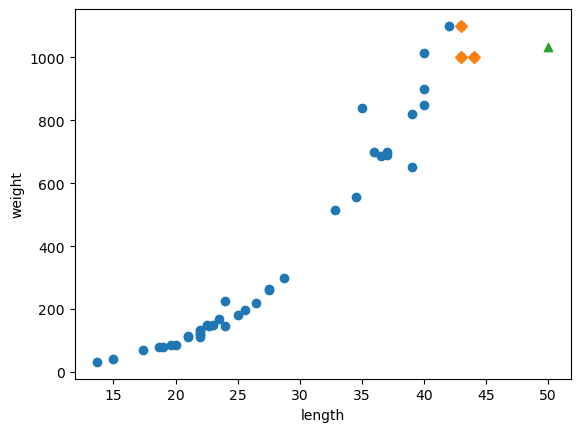

In [ ]:
#산점도를 통해 길이 50cm 농어의 표기
import matplotlib.pyplot as plt 

#50cm 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#이웃 샘플의 타깃 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [23]:
#새로운 샘플이 훈련 샘플의 범위를 벗어나면 엉뚱한 값이 예측됨
#길이가 100cm인 농어도 무게가 1033으로 예측됨
print(knr.predict([[100]]))

[1033.33333333]


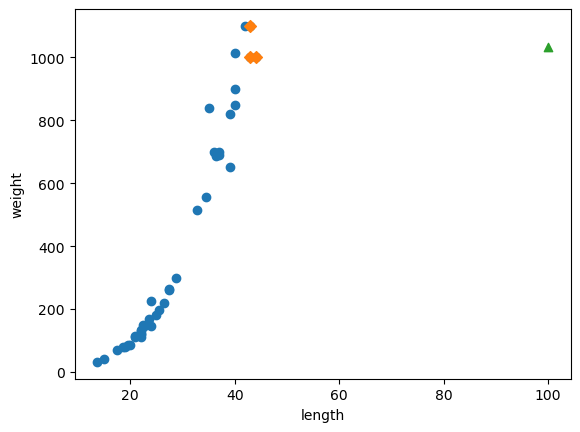

In [24]:
#길이 100cm농어의 산점도 그리기
distance, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형회귀(Linear Regresssion) 
### > sklearn.linear_model 패키지 -> Linear Regression 알고리즘 구현
### > 사이킷런의 모델 클래스는 훈련(fit()), 평가(score()), 예측(predict()) method의 동일

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#훈련세트의 선형 회귀 모델 훈련
lr.fit(train_input,train_target)

# 50cm 농어의 무게예측
print(lr.predict([[50]]))

[1241.83860323]


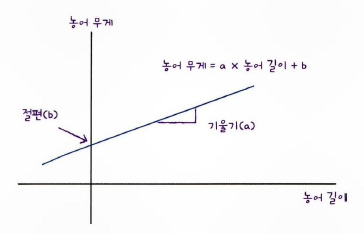

### > y=ax+b
### > a = lr.coef에 저장 (coef_:계수(coefficient or 가중치(weight))
### > b = lr.intercept_

### > 모델 파라미터(model parameter): coef_, intercept_ 
### > 많은 머신러닝 훈련과정은 최적의 모델 파라미터를 찾는 것
### > 이를 모델 기반 학습이라함
### > k-최근접 이웃 모델 학습 --> 사례 기반 학습 

In [29]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


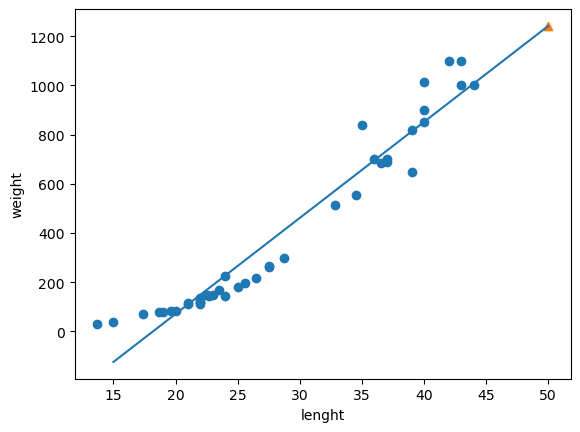

In [31]:
#훈련세트의 산점도 그리기 
plt.scatter(train_input,train_target)

#길이 15, 50까지 1차 방정식 그리기 
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [34]:
#선형 회귀 알고리즘이 찾은 직선에 훈련세트와 테스트세트의 R2값 구하기
print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))

#훈련세트 점수= 0.939
#테스트세트 점수= 0.824
#훈련세트 > 테스트세트 --> 전체적으로 과소적합 

0.939846333997604
0.8247503123313558


##### 다항회귀
##### y= ax2+bx+c
##### 2차 방정식의 그래프를 그리려면 제곱한 항이 훈련 세트에 추가 되야함

In [35]:
#column_stack 함수를 사용해서 train_input 제곱한 것과 train_input 두 배열을 붙임
train_poly= np.column_stack((train_input ** 2, train_input))
test_poly= np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

#(42,2) -> 42는 랜덤 농어/빙어, 2는 길이제곱값 1열 , 길이값 1열

(42, 2) (14, 2)


In [ ]:
#train_poly로 선형회귀모델 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
#계수와 절편 값 구하기
print(lr.coef_, lr.intercept_)

#무게= 1.01*길이2-21.6*길이+116.05
#다항식(polynomial) -> 다항회귀 (polynomial regression)

[  1.01433211 -21.55792498] 116.05021078278259


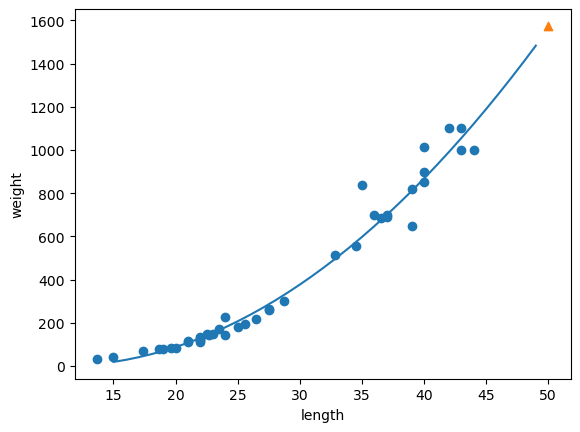

In [ ]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 50)

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#15에서 49까지의 2차 방적식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)

#50cm 농어데이터 표기
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

#훈련세트 점수=0.970
#테스트세트 점수=0.977
#훈련세트 < 테스트세트 -> 과소적합 조금 남아있음


0.9706807451768623
0.9775935108325121
